In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Order Details.csv')

In [3]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [4]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt
1499,B-26100,72.0,16.0,2,Clothing,Shirt


In [5]:
df.shape

(1500, 6)

In [7]:
df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [8]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [9]:
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [11]:
df1 = df.drop(['Order ID', 'Category', 'Sub-Category'], axis = 1) 

In [12]:
df1.head()

,Amount,Profit,Quantity
0,1275.0,-1148.0,7
1,66.0,-12.0,5
2,8.0,-2.0,3
3,80.0,-56.0,4
4,168.0,-111.0,2


In [13]:
df1.isnull().sum()

Amount      0
Profit      0
Quantity    0
dtype: int64

In [16]:
X = df1.drop(['Profit'], axis = 1).values
y = df1['Profit'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred

array([ 1.44975053e+01,  9.92005299e+01,  1.21480091e+01,  1.02907265e+01,
        2.42973384e+01,  1.90657450e+01, -1.37560171e+01, -2.81223291e+00,
       -1.18565863e+00, -8.46485547e+00,  1.47686010e+01,  1.09732610e+01,
        1.06521875e+01,  1.06118001e+01,  3.02114662e+01,  2.97500496e+01,
        3.36340023e+00,  1.10636263e+01,  8.17196517e+01,  1.12847442e+01,
        1.81525022e+01, -1.10854474e+01,  3.05325398e+01,  3.35453896e+01,
        1.77102665e+01,  3.20995458e+01,  3.50550410e-01, -1.13565431e+01,
        1.23287396e+01,  8.53339963e+00, -8.73595118e+00, -9.36850784e+00,
        5.51022940e+01,  2.99711675e+01, -1.74206044e+01,  1.62548322e+01,
       -1.90875661e+01,  9.38707417e+00,  1.77506539e+01,  7.39903894e+00,
        2.60450749e+01, -1.18987345e+01,  1.60836922e+01,  7.57976942e+00,
        2.14152412e+01,  1.62548322e+01, -2.01719490e+01,  9.29670893e+00,
        7.90084296e+00,  4.99956494e+00, -4.57915025e+00,  8.44303439e+00,
        7.45807979e+01,  

In [23]:
lr.predict([[1275.0,7]])

array([72.71392489])

In [24]:
r2_score(y_test, y_pred)

0.06912246760161511

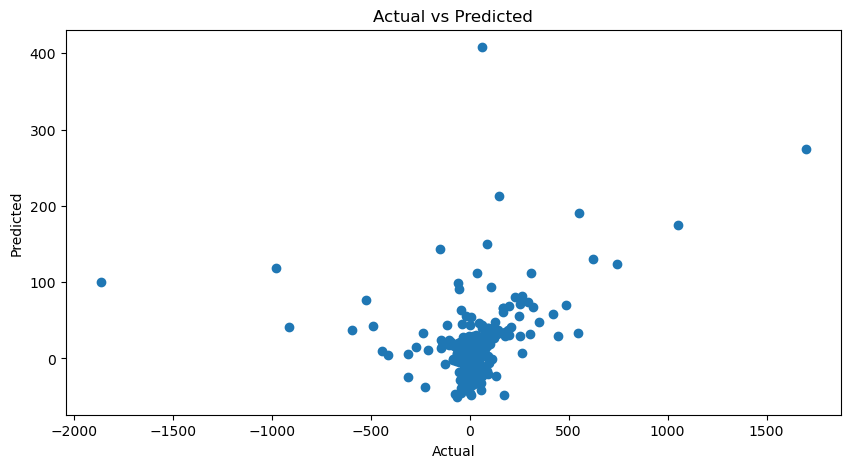

In [25]:
plt.figure(figsize= (10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [26]:
pred_y_df = pd.DataFrame({'Actual Values' : y_test, 'Predicted Value' : y_pred, 'Difference' : y_test - y_pred})
pred_y_df

,Actual Values,Predicted Value,Difference
0,9.0,14.497505,-5.497505
1,-60.0,99.200530,-159.200530
2,16.0,12.148009,3.851991
3,69.0,10.290727,58.709273
4,44.0,24.297338,19.702662
...,...,...,...
370,-2.0,7.358652,-9.358652
371,-9.0,-31.065755,22.065755
372,21.0,8.573787,12.426213
373,131.0,-22.359896,153.359896


<AxesSubplot:>

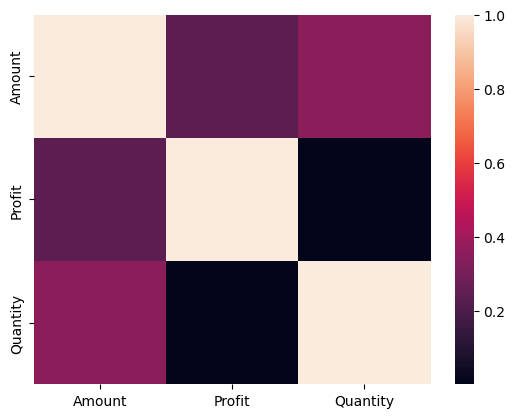

In [27]:
sns.heatmap(df1.corr())